In [14]:
import numpy as np
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn
# import sounddevice as sd
# import soundfile as sf
# from AimTTI_PLP import dev_TTI_PLP
from time import sleep
import csv  


#GET TENSOR FOR SPECTROGRAM
def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    sig,sr = torchaudio.load(aud)
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)
#VIEW SPECTROGRAM
def view_specrogram(aud,n_fft=1024, samplerate = 22050, hop_len=None, save = False):
    plt.rcParams.update({'font.size': 26})
    samples, sample_rate=librosa.load(aud, sr = samplerate)
    #print(sample_rate)
    audio_stft = librosa.core.stft(samples, hop_length=hop_len, n_fft=n_fft)# gathering the absolute values for all values in our audio_stft 
    spectrogram = np.abs(audio_stft)# Converting the amplitude to decibel
    librosa.feature.melspectrogram(S=spectrogram,sr=sample_rate, fmax=4000)
    #librosa.feature.spectral_bandwidth(*, y=None, sr=44100, S=None, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, pad_mode='constant', freq=None, centroid=None, norm=True, p=2)
    log_spectro = librosa.amplitude_to_db(spectrogram)# Plotting the short-time Fourier Transformation
    plt.figure(figsize=(20, 5))# Using librosa.display.specshow() to create our spectrogram
    librosa.display.specshow(log_spectro, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(label='Decibels')
    plt.title('Spectrogram (dB)', fontdict=dict(size=28))
    plt.xlabel('Time', fontdict=dict(size=26))
    plt.ylabel('Frequency', fontdict=dict(size=26))
    plt.tight_layout()
    if save:
        plt.savefig('spectrogram.png', dpi=300, bbox_inches='tight')
    plt.show()
def record_and_bang(duration,fs,channels, port,wav_name):
    myrec = sd.rec(int(duration*fs), samplerate=fs, channels = channels, blocking = False)
    TTI = dev_TTI_PLP(portstr=port)    
    idn=TTI.get_identity()
    print('GetIdentity (*IDN?) in AimTTI_PLP.py returns: {}'.format(idn))
    TTI._Vlimit = 12.0
    TTI.SetVoltage = 12.0
    TTI.SetCurrent = 0.30
    #sleep(2)
    TTI.OutputOff
    for i in range(8):

        sleep(0.5)
        TTI.OutputOn
        sleep(0.5)
        TTI.OutputOff
    
    TTI.close()
    sd.wait()
    sf.write(wav_name, myrec, fs)


In [21]:
# #AUTOMATION
# start=True
# location=''
# channels=1
# duration=4
# port='COM9'
# metal="Copper"
# num=0
# fs=int(44100)
# for i in range(5):
#     wav_name='fold_1/{}_{}.wav'.format(metal,i)
#     record_and_bang(duration,fs,channels, port,wav_name)
#     data = [wav_name, metal, num]
#     with open('fold_1/METADATA.csv', 'w', encoding='UTF8') as f:
#         writer = csv.writer(f)
#         writer.writerow(data)
#         f.close()

GetIdentity (*IDN?) in AimTTI_PLP.py returns: THURLBY THANDAR, PL303-P, 496139, 3.05-4.06
GetIdentity (*IDN?) in AimTTI_PLP.py returns: THURLBY THANDAR, PL303-P, 496139, 3.05-4.06
GetIdentity (*IDN?) in AimTTI_PLP.py returns: THURLBY THANDAR, PL303-P, 496139, 3.05-4.06
GetIdentity (*IDN?) in AimTTI_PLP.py returns: THURLBY THANDAR, PL303-P, 496139, 3.05-4.06
GetIdentity (*IDN?) in AimTTI_PLP.py returns: THURLBY THANDAR, PL303-P, 496139, 3.05-4.06


In [11]:
# wav_name='fold_1/new_file.wav'
# location=''
# channels=1
# duration=4
# port='COM9'
# fs=int(44100)
# record_and_bang(duration,fs,channels, port,wav_name)

GetIdentity (*IDN?) in AimTTI_PLP.py returns: THURLBY THANDAR, PL303-P, 496139, 3.05-4.06


In [6]:
# #PLAY SOUND
# myrecording=sd.playrec(myrec,fs,channels=1)

NameError: name 'myrec' is not defined

In [55]:
# sf.write('new_file.wav', myrec, fs)

44100


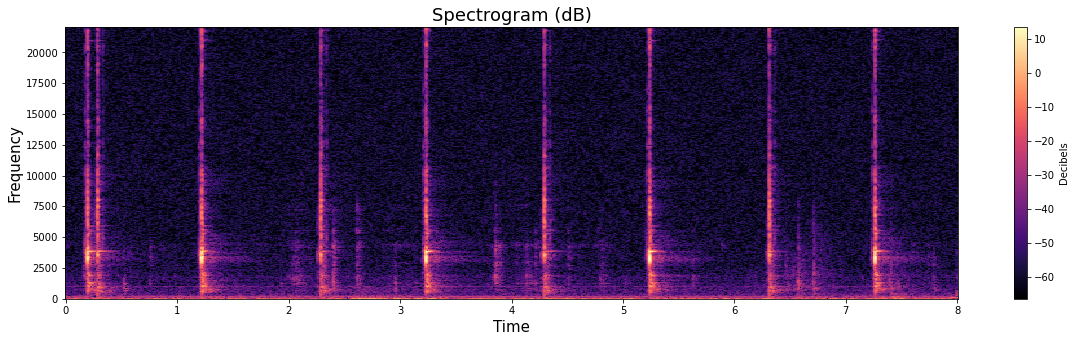

In [10]:
# view_specrogram('new_file.wav',n_fft=1024,samplerate=fs, hop_len=None)

In [73]:
# sf.write('new_file1.wav', myrec, 44100)

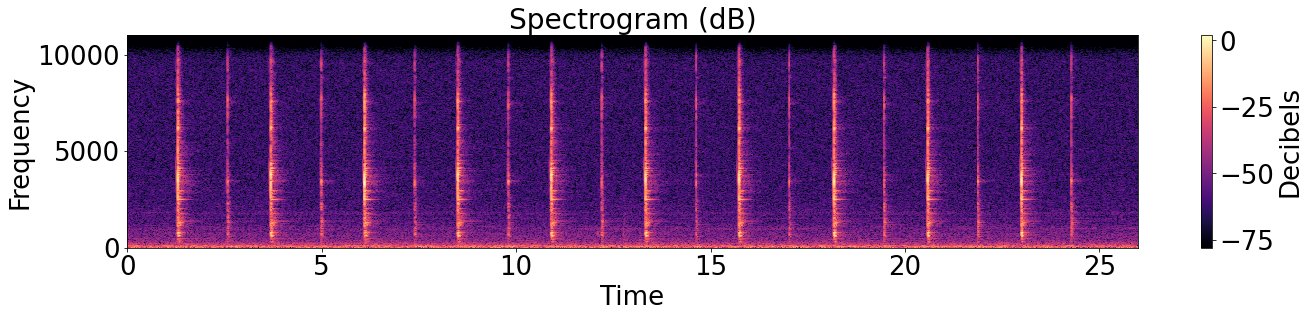

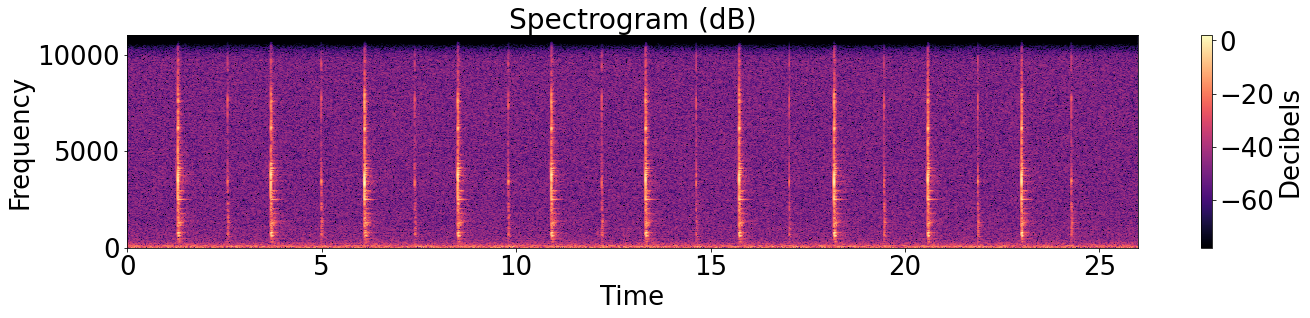

In [15]:
view_specrogram('Galvanised_90.wav',n_fft=1024, hop_len=None, save = False)
view_specrogram('Galvanised_90_noise.wav',n_fft=1024, hop_len=None, save=True)

22050


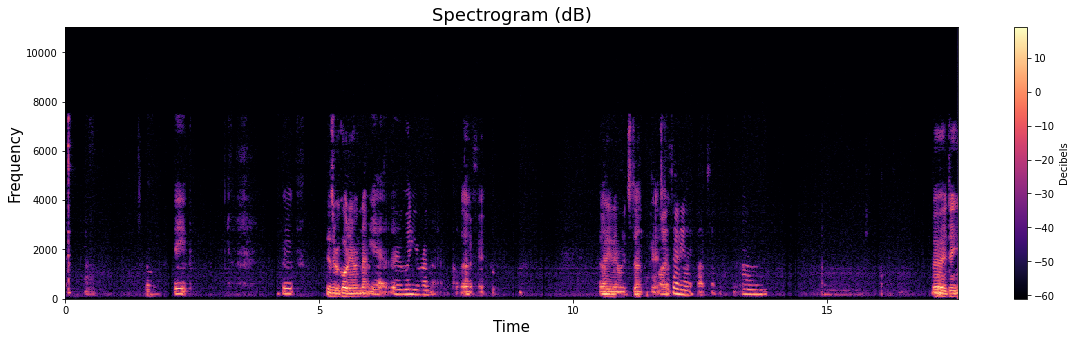

In [98]:
# sf.write('new_file2.wav', myrec, 44100*2)
# view_specrogram('new_file2.wav',n_fft=1024, hop_len=None)